In [48]:
import numpy as np
import pandas as pd
import xarray as xr

In [49]:
data = xr.DataArray(np.random.rand(2, 3), dims=['x', 'y'], coords={ 'x': [10, 20] })
data

<xarray.DataArray (x: 2, y: 3)>
array([[0.03874277, 0.37880394, 0.65874768],
       [0.19766823, 0.58697574, 0.1506735 ]])
Coordinates:
  * x        (x) int64 10 20
Dimensions without coordinates: y

In [50]:
xr.DataArray(pd.Series(range(3), index=list("abc"), name='foo'))

<xarray.DataArray 'foo' (dim_0: 3)>
array([0, 1, 2])
Coordinates:
  * dim_0    (dim_0) object 'a' 'b' 'c'

In [51]:
data.coords

Coordinates:
  * x        (x) int64 10 20

In [52]:
xr.DataArray(pd.Series(range(3), index=list("abc"), name="foo"))

<xarray.DataArray 'foo' (dim_0: 3)>
array([0, 1, 2])
Coordinates:
  * dim_0    (dim_0) object 'a' 'b' 'c'

## Indexing

Xarray provides 4 ways of indexing:
- Label based indexing along the provided dimension
- Slice indexing
- `loc[...]/iloc[...]` indexing
- `sel(<dim_name>=...)/isel(<dim_name>=...)`

Note that, if we have a dimension called `x`, the difference between `sel` and `isel` is the following:
- `sel` is meant to be used specifying a coordinate name, for example if we have 2 coordinate for the `x` dimension, `(10,20)`, using `sel` we must specify `10` or `20`, the coorindates name &rarr; `da.sel(x=10)`.
- `isel` does not consider coordinates labels, but the integer based index of the "array" of coordinates, so if we want to replicate the same example as above, we should have written `ds.isel(x=0)`.

In [53]:
data.loc[10] # indexing by coordinates name

<xarray.DataArray (y: 3)>
array([0.03874277, 0.37880394, 0.65874768])
Coordinates:
    x        int64 10
Dimensions without coordinates: y

In [54]:
data.isel(y=0) # integere select: by dimension name and INTEGERER

<xarray.DataArray (x: 2)>
array([0.03874277, 0.19766823])
Coordinates:
  * x        (x) int64 10 20

In [55]:
data.sel(x=10) # Select, by dimension name and LABEL

<xarray.DataArray (y: 3)>
array([0.03874277, 0.37880394, 0.65874768])
Coordinates:
    x        int64 10
Dimensions without coordinates: y

In [56]:
attrs = {
    "long_name": "random_velocity",
    "untis": "metres/sec",
    "description": "A random variaible",
    "random_attr": 123
}

data.attrs = attrs
data

<xarray.DataArray (x: 2, y: 3)>
array([[0.03874277, 0.37880394, 0.65874768],
       [0.19766823, 0.58697574, 0.1506735 ]])
Coordinates:
  * x        (x) int64 10 20
Dimensions without coordinates: y
Attributes:
    long_name:    random_velocity
    untis:        metres/sec
    description:  A random variaible
    random_attr:  123

## Computation

In [57]:
data + 10

<xarray.DataArray (x: 2, y: 3)>
array([[10.03874277, 10.37880394, 10.65874768],
       [10.19766823, 10.58697574, 10.1506735 ]])
Coordinates:
  * x        (x) int64 10 20
Dimensions without coordinates: y

In [58]:
np.sin(data)

<xarray.DataArray (x: 2, y: 3)>
array([[0.03873308, 0.36980947, 0.61212705],
       [0.1963835 , 0.5538455 , 0.15010403]])
Coordinates:
  * x        (x) int64 10 20
Dimensions without coordinates: y
Attributes:
    long_name:    random_velocity
    untis:        metres/sec
    description:  A random variaible
    random_attr:  123

In [59]:
data.sum()

<xarray.DataArray ()>
array(2.01161186)

In [60]:
a = xr.DataArray(np.random.randn(3), [data.coords["y"]])
a

<xarray.DataArray (y: 3)>
array([ 0.09423293, -0.24100432, -0.81014792])
Coordinates:
  * y        (y) int64 0 1 2

In [61]:

b = xr.DataArray(np.random.randn(4), dims="z")
b

<xarray.DataArray (z: 4)>
array([-0.45402867,  0.18552387, -0.84893173,  0.26864511])
Dimensions without coordinates: z

In [62]:
c = a + b
c

<xarray.DataArray (y: 3, z: 4)>
array([[-0.35979574,  0.27975681, -0.7546988 ,  0.36287805],
       [-0.69503299, -0.05548045, -1.08993605,  0.02764079],
       [-1.26417659, -0.62462405, -1.65907965, -0.54150281]])
Coordinates:
  * y        (y) int64 0 1 2
Dimensions without coordinates: z

In [32]:
np.random.randn(3)[:, np.newaxis] + np.random.randn(2)[np.newaxis, :]

array([[-0.62988879, -0.50308848],
       [ 1.153289  ,  1.28008931],
       [-2.86501307, -2.73821276]])

## Group By

In [82]:
labels = xr.DataArray(["E", "F", "E"], dims="y", name="labels")
data.groupby(labels).mean("y")

<xarray.DataArray (x: 2, labels: 2)>
array([[0.34874523, 0.37880394],
       [0.17417086, 0.58697574]])
Coordinates:
  * x        (x) int64 10 20
  * labels   (labels) object 'E' 'F'
Attributes:
    long_name:    random_velocity
    untis:        metres/sec
    description:  A random variaible
    random_attr:  123

In [80]:
data.groupby(labels).map(lambda x: x - x.min())

<xarray.DataArray (x: 2, y: 3)>
array([[0.        , 0.        , 0.62000491],
       [0.15892546, 0.20817179, 0.11193073]])
Coordinates:
  * x        (x) int64 10 20
Dimensions without coordinates: y

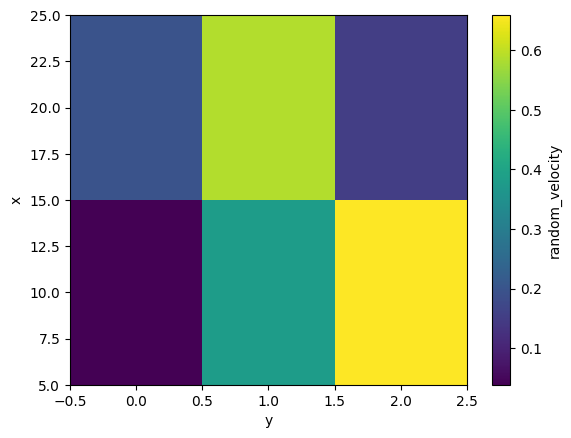

In [66]:
data.plot()

In [67]:
data.groupby(labels).sum().to_series()

x   labels
10  E         0.697490
    F         0.378804
20  E         0.348342
    F         0.586976
dtype: float64

# Datasets

In [92]:
ds = xr.Dataset({
    "foo": data,
    "bar": ("x", [1, 2]), # sharing x coord with above data
    "baz": np.pi,
})
ds

<xarray.Dataset>
Dimensions:  (x: 2, y: 3)
Coordinates:
  * x        (x) int64 10 20
Dimensions without coordinates: y
Data variables:
    foo      (x, y) float64 0.03874 0.3788 0.6587 0.1977 0.587 0.1507
    bar      (x) int64 1 2
    baz      float64 3.142

In [108]:
ds['bar'].sel(x=20)

<xarray.DataArray 'bar' ()>
array(2)
Coordinates:
    x        int64 20

## DataArray

In [122]:
# creating a data array in it's complete form
data = np.random.randn(4, 3)

locs = ["IA", "IL", "IN"]
times = pd.date_range("2000-01-01", periods=4)

# only data is required, all of the other argumenst, if not provided, will be 
# filled with default values
arr = xr.DataArray(data, coords=[times, locs], dims=["time", "space"], name="foo")

# akshually, only dimensions have default values, coordinates does not.
# != from pandas that always auto index data
arr

<xarray.DataArray 'foo' (time: 4, space: 3)>
array([[-1.08423687,  2.39924522,  0.44200702],
       [-0.61332835, -0.44821404,  0.98338429],
       [-0.04411061, -0.37975023,  0.02819183],
       [ 0.10483224, -0.37954637, -0.58862344]])
Coordinates:
  * time     (time) datetime64[ns] 2000-01-01 2000-01-02 2000-01-03 2000-01-04
  * space    (space) <U2 'IA' 'IL' 'IN'

Coordinates can be specified in the following ways:
- A **list of values** with lenght wqual to the number fo dimnesion, providing coordinate labels for each dimension. Each value must be of one of the following:
  - A `DataArray` or `Variabile` class members
  - A tuple of the form `(dims, data[, attrs])` wich is converted into arguments for `Variable`
  - A *pandas* object or scalar value.
  - A 1D array or list, which is interpreted as values for a one dimensional cooridnate variable along the same dimension as it's name.
- A **dictionary** of `{coord_name: coord}` where values are of the same form as the list. Supplying coordinates as a dict allows other coordinates than those corresponding to dimensions. If you supply `coords` as a dict, you MUST provide `dims`.

In [123]:
xr.DataArray(data, coords=[("time", times), ("space", locs)])

<xarray.DataArray (time: 4, space: 3)>
array([[-1.08423687,  2.39924522,  0.44200702],
       [-0.61332835, -0.44821404,  0.98338429],
       [-0.04411061, -0.37975023,  0.02819183],
       [ 0.10483224, -0.37954637, -0.58862344]])
Coordinates:
  * time     (time) datetime64[ns] 2000-01-01 2000-01-02 2000-01-03 2000-01-04
  * space    (space) <U2 'IA' 'IL' 'IN'

In [126]:
xr.DataArray(
    data,
    coords={
    "time": times,
    "space": locs,
    "const": 42,
    "ranking": ("space", [1, 2, 3]),
    },
    dims=["time", "space"]
)

<xarray.DataArray (time: 4, space: 3)>
array([[-1.08423687,  2.39924522,  0.44200702],
       [-0.61332835, -0.44821404,  0.98338429],
       [-0.04411061, -0.37975023,  0.02819183],
       [ 0.10483224, -0.37954637, -0.58862344]])
Coordinates:
  * time     (time) datetime64[ns] 2000-01-01 2000-01-02 2000-01-03 2000-01-04
  * space    (space) <U2 'IA' 'IL' 'IN'
    const    int64 42
    ranking  (space) int64 1 2 3

In [131]:
# Dictionary with coords across multiple dimensions
xr.DataArray(
    data,
    coords={
        "time":times,
        "space": locs,
        "const": 42,
        "rankin": (("time", "space"), np.arange(12).reshape(4, 3)),
    },
    dims=["time", "space"]
)

<xarray.DataArray (time: 4, space: 3)>
array([[-1.08423687,  2.39924522,  0.44200702],
       [-0.61332835, -0.44821404,  0.98338429],
       [-0.04411061, -0.37975023,  0.02819183],
       [ 0.10483224, -0.37954637, -0.58862344]])
Coordinates:
  * time     (time) datetime64[ns] 2000-01-01 2000-01-02 2000-01-03 2000-01-04
  * space    (space) <U2 'IA' 'IL' 'IN'
    const    int64 42
    rankin   (time, space) int64 0 1 2 3 4 5 6 7 8 9 10 11

In [135]:
# Constructor by pandas Data Structure
df = pd.DataFrame({ "x": [0, 1], "y": [2, 3]}, index=["a", "b"])
df.index.name = "abc"
df.columns.name = "xyz"
df

xyz,x,y
abc,,
a,0,2
b,1,3


In [136]:
xr.DataArray(df)

<xarray.DataArray (abc: 2, xyz: 2)>
array([[0, 2],
       [1, 3]])
Coordinates:
  * abc      (abc) object 'a' 'b'
  * xyz      (xyz) object 'x' 'y'

In [137]:
ds

<xarray.Dataset>
Dimensions:  (x: 2, y: 3)
Coordinates:
  * x        (x) int64 10 20
Dimensions without coordinates: y
Data variables:
    foo      (x, y) float64 0.03874 0.3788 0.6587 0.1977 0.587 0.1507
    bar      (x) int64 1 2
    baz      float64 3.142

In [139]:
arr.values = 1.0 * arr.values

<xarray.DataArray 'foo' (time: 4, space: 3)>
array([[-1.08423687,  2.39924522,  0.44200702],
       [-0.61332835, -0.44821404,  0.98338429],
       [-0.04411061, -0.37975023,  0.02819183],
       [ 0.10483224, -0.37954637, -0.58862344]])
Coordinates:
  * time     (time) datetime64[ns] 2000-01-01 2000-01-02 2000-01-03 2000-01-04
  * space    (space) <U2 'IA' 'IL' 'IN'

### DataArray Coordinates

In [144]:
arr['time'] == arr.coords["time"]

NameError: name 'array_equal' is not defined